### 1. Install Dependencies and Setup

In [2]:
import os
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
#For removing .DS_Store files from the dataset
def remove_ds_store(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == '.DS_Store':
                os.remove(os.path.join(root, file))

data_dir = '/Users/r1/Documents/Projets_python/IA/Animal_detection_project/dataset'
remove_ds_store(data_dir)


### 2. Remove dodgy images

In [4]:
import cv2
import imghdr
data_dir ='/Users/r1/Documents/Projets_python/IA/Animal_detection_project/dataset'
image_exts= ['.jpg', '.jpeg', '.png', '.bmp']

for image_category in os.listdir(data_dir):
    for image_class in os.listdir(os.path.join(data_dir, image_category)):
        class_path = os.path.join(data_dir, image_category, image_class)
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path) # Load the image with OpenCV to check if it is readable.
                tip = imghdr.what(image_path) # Use the `imghdr` module to detect the image file type.
                if tip not in image_exts: 
                    print("Image not in ext list {}".format(image_path)) # If the image is not in the allowed extensions, print a message and delete it.
                    os.remove(image_path) 
            except Exception as e: # Catch any exception raised (e.g., if the file is corrupted or inaccessible).
                print("Issue with image {}:".format(image_path))
                # os.remove(image_path)  # If an exception is raised, delete the image.


IndentationError: unexpected indent (4089189511.py, line 13)

### 3. Load Data and Preprocessing

In [5]:
data=tf.keras.utils.image_dataset_from_directory("/Users/r1/Documents/Projets_python/IA/Animal_detection_project/dataset")

Found 15252 files belonging to 29 classes.


In [6]:
data_iterator=data.as_numpy_iterator()
data_iterator
batch=data_iterator.next()
batch[1]

array([ 7, 20, 13,  8, 26,  5,  9,  3, 15, 28, 20, 23,  7,  3,  6, 20, 19,
        7, 18, 15, 22, 21,  7,  7,  2,  8, 27, 15,  7,  4, 27, 22],
      dtype=int32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


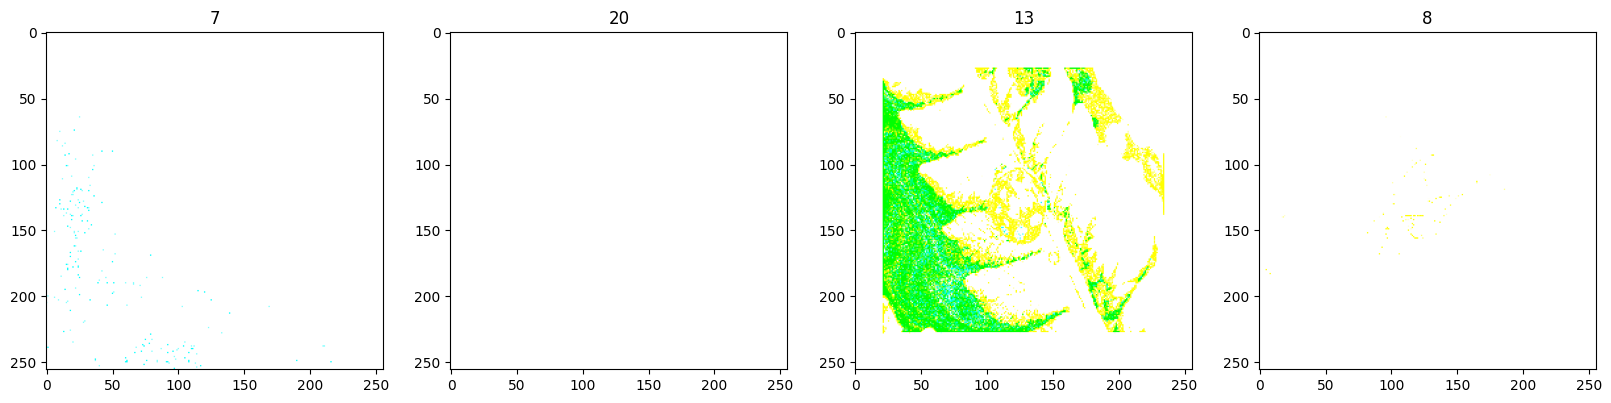

In [9]:
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [11]:
scaled_data=data.map(lambda x,y:(x/255,y))

In [18]:
scaled_iterator=scaled_data.as_numpy_iterator()
batch=scaled_iterator.next()

In [13]:
batch[0].max()

1.0

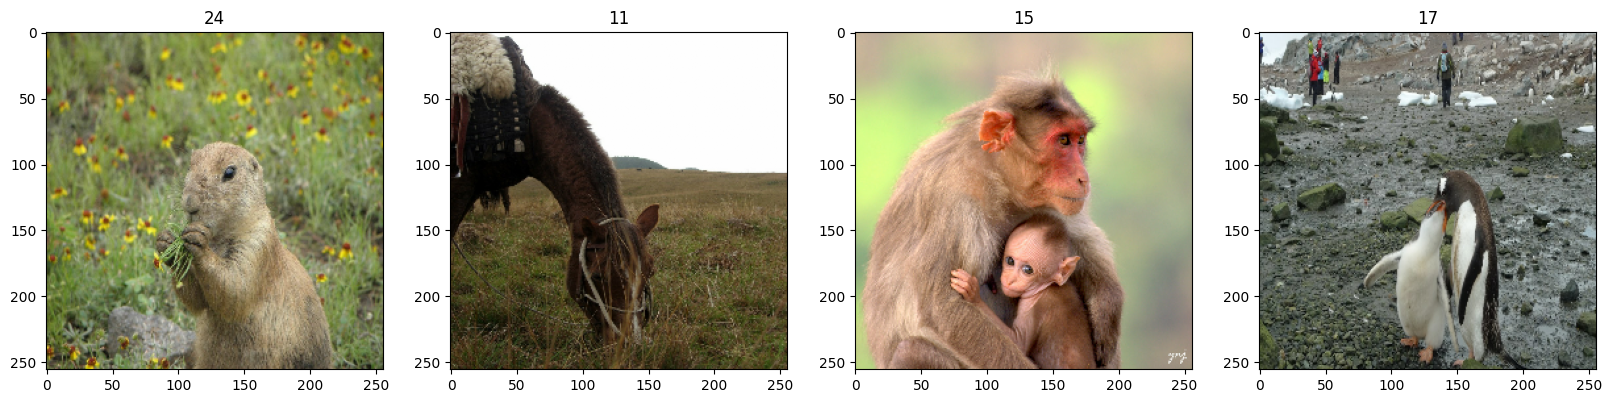

In [19]:
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])   


In [20]:
batch[0].max()

1.0

### 4. Split the dataset

In [21]:
print(len(data))
train_size=(int(len(data)*0.7))
val_size=int(len(data)*0.2)+1
test_size=int(len(data)*0.1)+1

477


In [22]:
train=data.take(train_size)
test=data.skip(train_size).take(test_size)
val=test.take(train_size+test_size).take(val_size)

### 5. Build Deep Learning Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [24]:
model=Sequential()

In [25]:
# Première couche de convolution et pooling
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# Deuxième couche de convolution et pooling
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

# Troisième couche de convolution et pooling
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

# Aplatissement des données
model.add(Flatten())

# Couche dense avec 256 neurones
model.add(Dense(256, activation='relu'))

# Couche de sortie pour 29 classes
model.add(Dense(29, activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,703,821 (14.13 MB)

 Trainable params: 3,703,821 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

### 6. Train

In [27]:
logdir="/Users/r1/Documents/Projets_python/IA/Animal_detection_project/logs"
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model.fit(train, validation_data=val, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 186s 553ms/step - accuracy: 0.0599 - loss: 30.0525 - val_accuracy: 0.0898 - val_loss: 3.2635
Epoch 2/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 134s 402ms/step - accuracy: 0.1152 - loss: 3.1412 - val_accuracy: 0.1035 - val_loss: 3.3029
Epoch 3/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 133s 399ms/step - accuracy: 0.2250 - loss: 2.7518 - val_accuracy: 0.1094 - val_loss: 3.5359
Epoch 4/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 135s 404ms/step - accuracy: 0.3649 - loss: 2.2611 - val_accuracy: 0.1126 - val_loss: 4.1495
Epoch 5/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 139s 416ms/step - accuracy: 0.4730 - loss: 1.9223 - val_accuracy: 0.1296 - val_loss: 4.7366
Epoch 6/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 135s 405ms/step - accuracy: 0.5532 - loss: 1.6572 - val_accuracy: 0.1406 - val_loss: 5.2864
Epoch 7/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 139s 418ms/step - accuracy: 0.6209 - loss: 1.4139 - val_accuracy: 0.1517 - val_loss: 5.6789
Epoch 8/20
333/333 ━━━━━━━━━━━━━━━━━━━━ 155s 466ms/step - accuracy: 0.6571 

### 7. Plot Performance

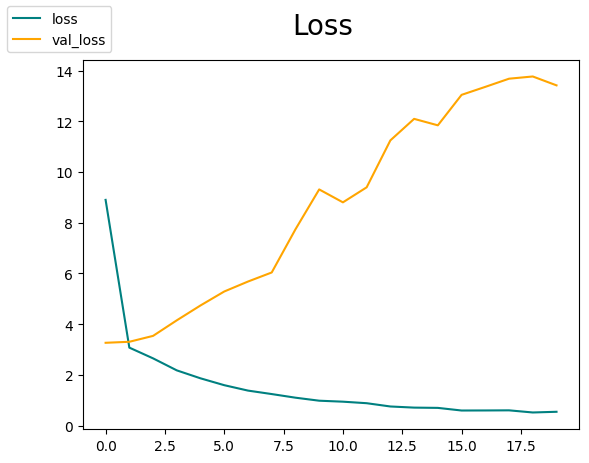

In [28]:
fig=plt.figure()
plt.plot(hist.history['loss'],color="teal",label="loss")
plt.plot(hist.history['val_loss'],color="orange",label="val_loss")
fig.suptitle('Loss', fontsize=20)
fig.legend(loc="upper left")
plt.show()

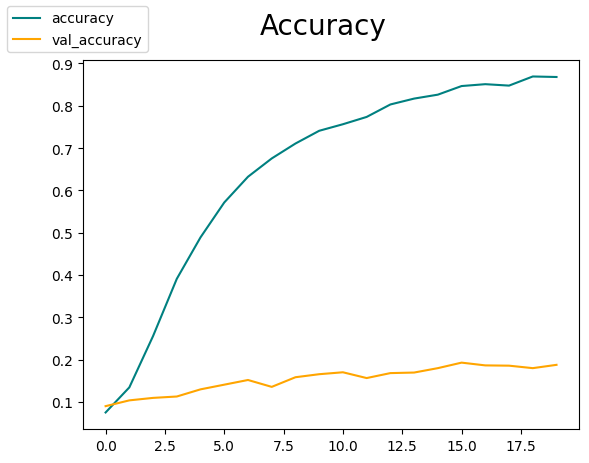

In [29]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color="teal",label="accuracy")
plt.plot(hist.history['val_accuracy'],color="orange",label="val_accuracy")
fig.suptitle('Accuracy', fontsize=20)
fig.legend(loc="upper left")
plt.show()

### 8. Evaluate Performance